### Capstone Healthcare PGP by Sohyon Warner

## Import

#### Import basic starter libraries

In [1]:
import os
import pandas as pd
import numpy as np

#### Import data to be analysed 

In [3]:
Diabetes = pd.read_csv('health care diabetes.csv')

In [4]:
Diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Week 1

## Data Exploration

In [12]:
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Diabetes data contains all numeric values.  8 Independent variable and 1 dependent variable, "Outcome".  

In [13]:
Diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Detecting "0" minimum values in Glucose, BloodPressure, Skin Thickness, Insuline, and BMI, which implies that there are zero values in dataset. Since no human being can have zero Glucose, BloodPresurre, Skin Thickness, Insuline, and BMI, the date points that are zeroes should be removed or managed. 

#### Also, did not detecting any constant variables, which implies all independent variables can be factored in during modeling for now.

### Remove zero values from the Diabetes dataset

In [5]:
# First, look for missing value and replace 

print(Diabetes.isnull().values.any())
 

False


#### Not detecting any missing values

In [6]:
# With discovered zero values, converting '0'independent values to np.nan.  

Diabetes['Glucose'].replace(0, np.nan,inplace=True)
Diabetes['BloodPressure'].replace(0, np.nan,inplace=True) 
Diabetes['SkinThickness'].replace(0, np.nan,inplace=True)
Diabetes['Insulin'].replace(0, np.nan,inplace=True)
Diabetes['BMI'].replace(0, np.nan,inplace=True)

### Explore the diseases with the visualization

###  -  Import visualization libraries 

In [7]:
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pal = sns.color_palette()

### Explore 5 variables: Glucose, BloodPressure, SkinThickness, Insulin, BMI per project instruction

###  - Use distribution graphes and .describe data to analyse the independent variables.

C:\Users\Sohyon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Glucose', ylabel='Density'>

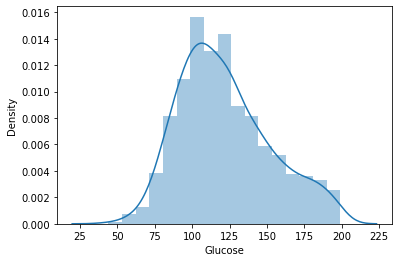

In [8]:
# Distribution Plot
sns.distplot(Diabetes['Glucose'])


####  Base on the graph and .describe, Glucose mean is about 120 where highest number of people have gloucose readings of about 100 and 125.  

#### Glucose follows close to normal distirbution with a slight skew.  Not detecting anything abnormal but more population is above Glucose reading above 100 vs. below 100

C:\Users\Sohyon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

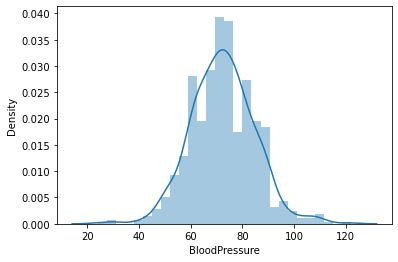

In [9]:
sns.distplot(Diabetes['BloodPressure'])

#### Blood Pressure mean is about 70 and high number of people's blood pressure measurement fall between 60 and 80.

C:\Users\Sohyon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>

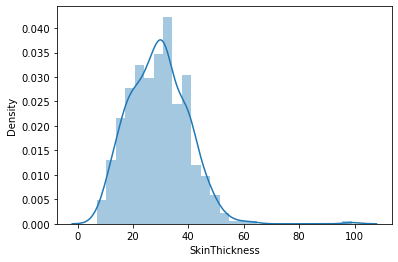

In [10]:
sns.distplot(Diabetes['SkinThickness'])

#### Skin Thickness mean is around 20 and following close to the normal distribution

C:\Users\Sohyon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

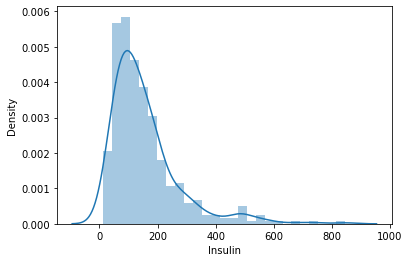

In [11]:
sns.distplot(Diabetes['Insulin'])


####  I am detecting high skewness in the Insuline data.  The mean is about 80 but 50 percentile is about 31.

C:\Users\Sohyon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

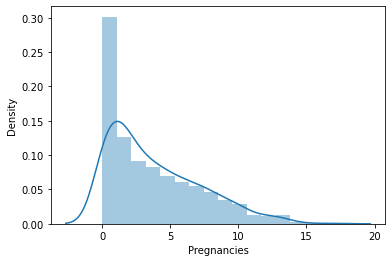

In [14]:
sns.distplot(Diabetes['Pregnancies'])

#### The high percentage of people had one child. The mean pregranancy is about 3.8.

#### Detecting BMI follows close to the normal distribution with the mean at 32 and 50 percentile is about 32.

In [ ]:
sns.distplot(Diabetes['BMI'])

(array([ 1.,  3.,  4., 15., 28., 59., 65., 84., 88., 73., 85., 40., 49.,
        39., 29., 25., 21., 23., 16., 16.]),
 array([ 44.  ,  51.75,  59.5 ,  67.25,  75.  ,  82.75,  90.5 ,  98.25,
        106.  , 113.75, 121.5 , 129.25, 137.  , 144.75, 152.5 , 160.25,
        168.  , 175.75, 183.5 , 191.25, 199.  ]),
 <BarContainer object of 20 artists>)

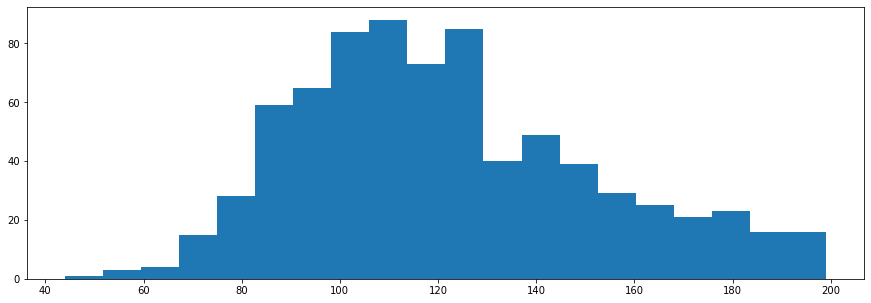

In [13]:
# Histogram
HistGlucose = Diabetes['Glucose'].values
plt.figure(figsize=(15, 5))
plt.hist(HistGlucose, bins=20)

#### Although the project instruction to perform the histrogram of independent variables but would prefer distribution chart that contains both histogram and the distributin line. 

C:\Users\Sohyon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin'>

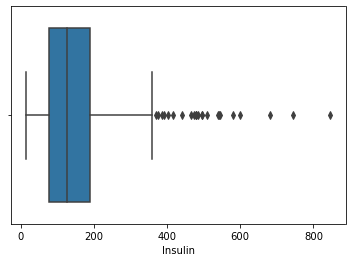

In [16]:
# Boxplot
sns.boxplot(Diabetes['Insulin'])

#### Detecting outliers in Insulin data

C:\Users\Sohyon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Glucose'>

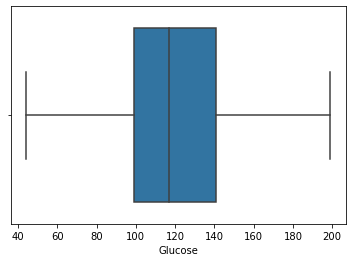

In [17]:
# Boxplot
sns.boxplot(Diabetes['Glucose'])

#### Not detecting outliers

C:\Users\Sohyon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BloodPressure'>

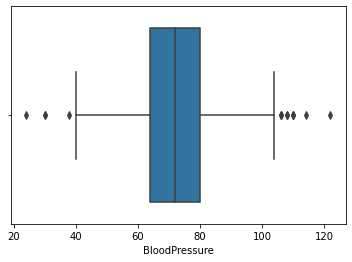

In [18]:
sns.boxplot(Diabetes['BloodPressure'])

#### Detecting Blood Pressure outliers at both ends.  How can some one can bloodpressure less than 40? 

C:\Users\Sohyon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SkinThickness'>

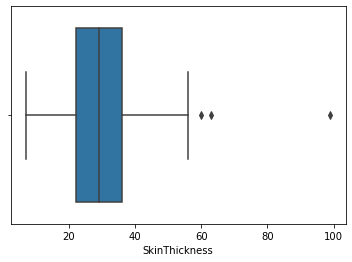

In [21]:
sns.boxplot(Diabetes['SkinThickness'])

#### small amount of Skin Thickness outliers detected

C:\Users\Sohyon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI'>

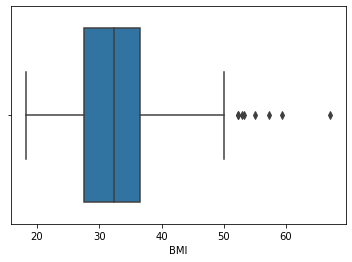

In [19]:
sns.boxplot(Diabetes['BMI'])

#### Detecting a several BMI outliers

### Explore datatype in "Diabetes" dataset.

#### Compare the data count after the zero replaced by Nan.

In [27]:
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


#### - Note the decrease in the qty of the data set available in Glucose, BloodPressure, SkinThickness, Insuline,and BMI

### With the "zero" data set not counted, still detecting high number of "Insulin" outliers. Need to perform the correlationship evalluation of all the independent variables to the outcome to rank the importance. 

## Week2 

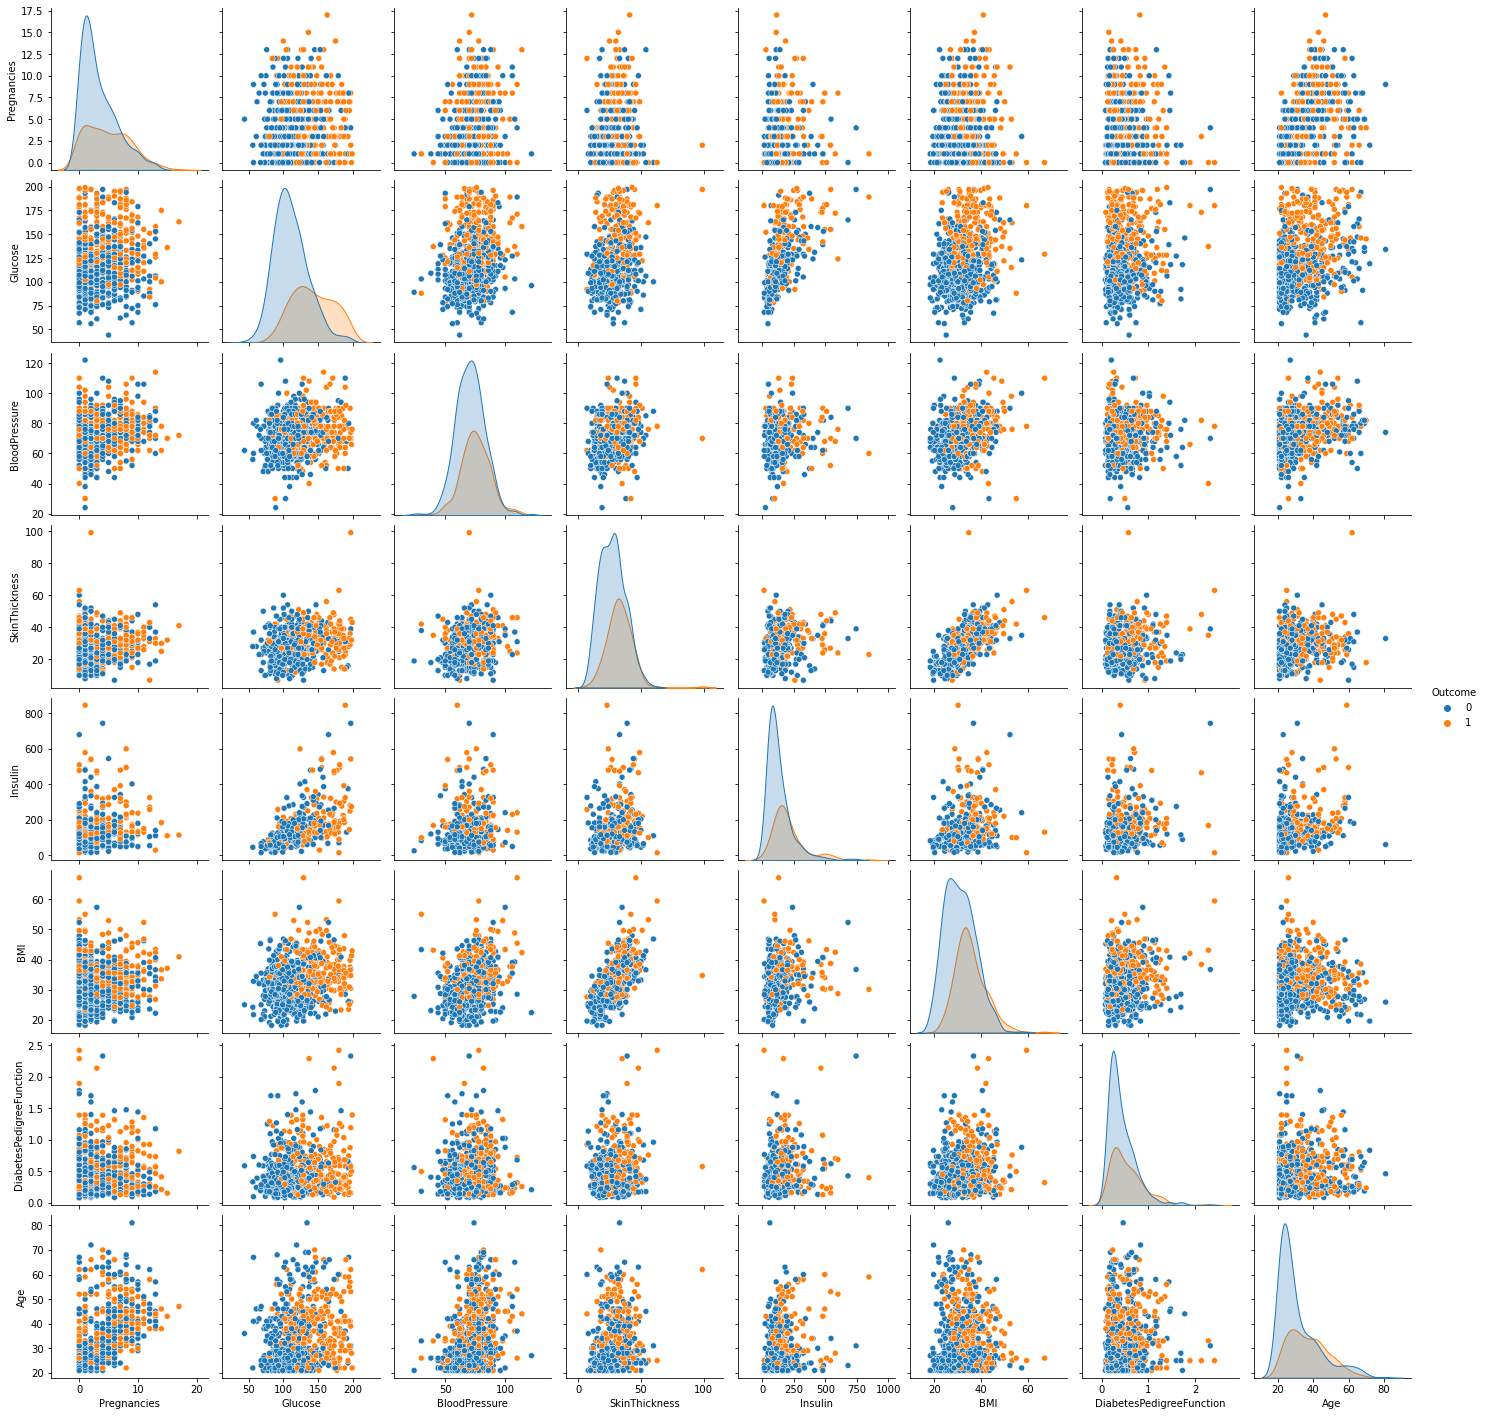

In [22]:
# Pairplot is performed
sns.pairplot(Diabetes,diag_kind='kde', hue="Outcome")

#### Observing the scatter plots, Glucose showed the best separtions in clusters and distribution lines.

In [23]:
# Check for skewness
Diabetes.skew()

Pregnancies                 0.901674
Glucose                     0.530989
BloodPressure               0.134153
SkinThickness               0.690619
Insulin                     2.166464
BMI                         0.593970
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

#### *If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.

#### BloodPressure is most symmetrical.  Glucose, SkinThickness, and BMI are moderately skewed.  Insulin is highly skewed. 

<AxesSubplot:>

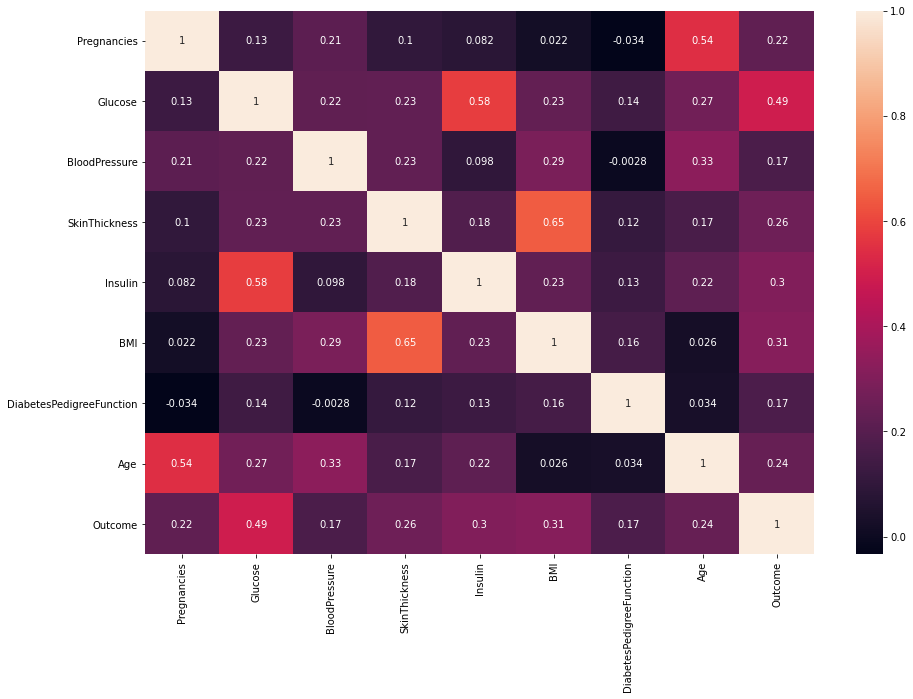

In [24]:
# Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(Diabetes.corr(),annot=True)

#### Per the heatmap above, Glucose(.49) have the higher correlationship with positive diabetes outcome, followed by BMI(.31), Insulin (.30), Skin Thickness (.26), and Age (.24) among the five disease we are concentrating. Considering to drop two variables with the same corelationship numbers.


### Glucose with the most strong positive correlationship has no outliers, I need to decide if I need to remove the outliers from Insuline due to high number of outliers and BMI with a several outliers.

In [29]:
# Remove outliers of important independent variables

Q1=Diabetes['Insulin'].quantile(0.25)
Q3=Diabetes["Insulin"].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
print(Lower_Whisker, Upper_Whisker)

76.25
190.0
113.75
-94.375 360.625


In [36]:
Diabetes1 = Diabetes['Insulin']< Upper_Whisker

In [37]:
Diabetes1.head()

0    False
1    False
2    False
3     True
4     True
Name: Insulin, dtype: bool

## Week 3

####  With the top 5 variables (Glucose, BMI, Insuline, SkinThickness, Age ) correlationships to the diabetes presense, I can hypothesize that we are looking for binary prediction. Therefore, we are most likely are looking for sigmoid curve model, logistic regression.  Glucose and BMI are considered moderatly skewed. With the correleationship between Insuline and Diabetes, and the insuline being the highly skew data, I am also strongly supporting the logistic regression would produce the best model.

#### However, I will start with the liner regression as a baseline

#### First, importing starter ML libraries sklearn

In [35]:
from sklearn.experimental import enable_iterative_imputer   
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler,MinMaxScaler  
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [38]:
#### droping non-five essential variables off the dataset
DiabetesSanPreg = Diabetes.drop("Pregnancies", axis=1)

In [40]:
DiabetesSanPed = DiabetesSanPreg.drop("DiabetesPedigreeFunction", axis=1)

In [41]:
Top5VarDiabetes = DiabetesSanPed.drop("Age", axis=1)

In [42]:
Top5VarDiabetes.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Outcome
0,148.0,72.0,35.0,NaN,33.6,1
1,85.0,66.0,29.0,NaN,26.6,0
2,183.0,64.0,NaN,NaN,23.3,1
3,89.0,66.0,23.0,94.0,28.1,0
4,137.0,40.0,35.0,168.0,43.1,1


In [45]:
 ### detecting Nan, need to drop Nan rows
Top5Var = Top5VarDiabetes.dropna()

In [46]:
Top5Var.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Outcome
3,89.0,66.0,23.0,94.0,28.1,0
4,137.0,40.0,35.0,168.0,43.1,1
6,78.0,50.0,32.0,88.0,31.0,1
8,197.0,70.0,45.0,543.0,30.5,1
13,189.0,60.0,23.0,846.0,30.1,1


#### Baseline Linear Regression

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer

X=Top5Var.drop('Outcome',axis=1)
y=Top5Var[['Outcome']]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)

pipe = Pipeline((
 
("poly",PolynomialFeatures(degree=1)),
("lr", LinearRegression()),
))
pipe.fit(Xtrain,ytrain)

print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))

Training R2
0.3170125622721549
Testing R2
0.2137838949741181


#### Baseline Linear Regression with PowerTransformer

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer

X=Top5Var.drop('Outcome',axis=1)
y=Top5Var[['Outcome']]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)

pipe = Pipeline((
("pt",PowerTransformer()),
("poly",PolynomialFeatures(degree=1)),
("lr", LinearRegression()),
))
pipe.fit(Xtrain,ytrain)

print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))

Training R2
0.3030386994478905
Testing R2
0.2185732285170926


#### Linear Regression R2 values for both Training and Testing are low.  

#### With my hypothesis regarding the skewness of the top variable "Insulin" being highly skew and the outcome of diabetes is in binary in nature, the logistic regression would produce good results, the logistic regression will be performed.

In [56]:
pipe = Pipeline((
("it", IterativeImputer()),
("pt",PowerTransformer()),
("sc", StandardScaler()),
("lr", LogisticRegression()),
))
pipe.fit(Xtrain,ytrain)
print("Testing Accuracy")
print(pipe.score(Xtest,ytest))
print("Training Accuracy")
print(pipe.score(Xtrain,ytrain))

Testing Accuracy
0.7848101265822784
Training Accuracy
0.7827476038338658


C:\Users\Sohyon\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [57]:
pipe = Pipeline((
("it", IterativeImputer()),
("sc", StandardScaler()),
("lr", LogisticRegression()),
))
pipe.fit(Xtrain,ytrain)
print("Testing Accuracy")
print(pipe.score(Xtest,ytest))
print("Training Accuracy")
print(pipe.score(Xtrain,ytrain))

Testing Accuracy
0.7974683544303798
Training Accuracy
0.7891373801916933


C:\Users\Sohyon\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [58]:
pipe = Pipeline((
("it", IterativeImputer()),
("pt",PowerTransformer()), 
("lr", LogisticRegression()),
))
pipe.fit(Xtrain,ytrain)
print("Testing Accuracy")
print(pipe.score(Xtest,ytest))
print("Training Accuracy")
print(pipe.score(Xtrain,ytrain))

Testing Accuracy
0.7848101265822784
Training Accuracy
0.7827476038338658


C:\Users\Sohyon\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Building a KNN model to be compared

In [77]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=15)  
knn_model.fit(Xtrain, ytrain)

KNeighborsRegressor(n_neighbors=15)

In [78]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(Xtrain)
mse = mean_squared_error(ytrain, train_preds)
rmse = sqrt(mse)
rmse

0.39539414287709457

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn_modelc = KNeighborsClassifier(n_neighbors=8)  
knn_modelc.fit(Xtrain, ytrain)

<ipython-input-81-665f234782ce>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_modelc.fit(Xtrain, ytrain)


KNeighborsClassifier(n_neighbors=8)

In [82]:

train_predsC = knn_modelc.predict(Xtrain)
mse = mean_squared_error(ytrain, train_predsC)
rmse = sqrt(mse)
rmse

0.46951814059208397

In [83]:
pipe = Pipeline((
("it", IterativeImputer()),
("pt",PowerTransformer()), 
("KNN", KNeighborsClassifier(n_neighbors=17)),
))
pipe.fit(Xtrain,ytrain)
print("Testing Accuracy")
print(pipe.score(Xtest,ytest))
print("Training Accuracy")
print(pipe.score(Xtrain,ytrain))

Testing Accuracy
0.759493670886076
Training Accuracy
0.7827476038338658


C:\Users\Sohyon\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


# Week 4

In [84]:
# Confusion Matrix and F2 Score of multiclassification
predicted = pipe.predict(Xtest)
from sklearn.metrics import confusion_matrix,classification_report,recall_score,precision_score,f1_score
print(confusion_matrix(ytest,predicted))
print(classification_report(ytest,predicted))

[[51  5]
 [14  9]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        56
           1       0.64      0.39      0.49        23

    accuracy                           0.76        79
   macro avg       0.71      0.65      0.66        79
weighted avg       0.74      0.76      0.74        79



In [88]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(Xtrain, ytrain)
model2.fit(Xtrain, ytrain)

# predict probabilities
pred_prob1 = model1.predict_proba(Xtest)
pred_prob2 = model2.predict_proba(Xtest)

C:\Users\Sohyon\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-88-bd3396815511>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model2.fit(Xtrain, ytrain)


In [92]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(ytest, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(ytest, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(ytest))]
p_fpr, p_tpr, _ = roc_curve(ytest, random_probs, pos_label=1)



In [93]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(ytest, pred_prob1[:,1])
auc_score2 = roc_auc_score(ytest, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.8082298136645962 0.7302018633540373


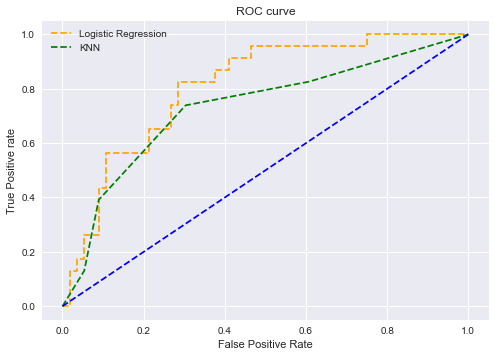

In [94]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();